# Exploration of FordGoBike and Baywheels data from Lyft in San Francisco to elaborate growth and business oportunities 

## by Alex (DAND 2020)


The project is part of the Udacity Data Analyst Nano Degree (DAND) program and aims on data visualization in both ways - exploratory and explainatory.   

The project has been executed using a dataset from FordGoBike and Lyft Baywheels from the San Francisco area.   
This file contains the exploration of the data.   
The explanation part is covered in a separate file. At the moment of analysis, the dataset contains bike sharing rides from June 2017 till April 2020 which was automaticaly downloaded from the source.  
Over 3 million rides are described by 13 different dimensions and datapoints.   
The dataset contains ride-related and anonymized data only. That means, no user data or user names or personal data is content of the raw data.

Each trip is anonymized and includes:

Trip Duration (in seconds)  
Start Time and Date  
End Time and Date  
Start Station ID  
Start Station Name  
Start Station Latitude  
Start Station Longitude  
End Station ID  
End Station Name  
End Station Latitude  
End Station Longitude  
Bike ID  
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)  

Source of and download of the raw data: https://www.lyft.com/bikes/bay-wheels/system-data  


In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from os import listdir
from os import makedirs
from zipfile import ZipFile
from io import BytesIO
from functools import reduce
from glob import glob

%matplotlib inline

## Gathering data as automatic download from source 

Source: https://www.lyft.com/bikes/bay-wheels/system-data  

In [6]:
#Create folder for the downloaded files
dest_folder = "download_raw_data"

In [9]:
#List of file urls to be downloaded for years 2018, 2019 and until 03/2020 as raw data for the analysis // Status 04. June 2020

download_urls = ["https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip",
                 "https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip",
                 ]

In [11]:
#Download and unzip and store the raw data from the source
for url in download_urls: 
    downloaded_response = requests.get(url)
    path_file = dest_folder + url
    zipped_file = ZipFile(BytesIO(downloaded_response.content))
    zipped_file.extractall(dest_folder)
    zipped_file.close()
    
# 0.91GB of data in csv format was downloaded

In [22]:
#List of file names for loop to combine data in df
files_raw_data = []
files_raw_data = listdir(dest_folder)

In [23]:
#Check List of file names
files_raw_data

['201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv',
 '201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '202001-baywheels-tripdata.csv',
 '202002-baywheels-tripdata.csv',
 '202003-baywheels-tripdata.csv']

In [24]:
df = pd.read_csv(f'{dest_folder}/202003-baywheels-tripdata.csv')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


## Parse the csv files with pandas read_csv

The df.info() function helps us to parse the CSV files in a dataframe. 

We will use DTypes as a parameter of read_csv to guess and clean the datatype of every column.

We start with a new list of files.

In [29]:
list_csv = []

fileList = glob(f'{dest_folder}/*.csv')
for file_name in fileList:
    list_csv.append(
        pd.read_csv(
            file_name, 
            dtype={
                'duration_sec':int, 
                'start_time':str,
                'end_time':str,
                'start_station_id':str,
                'start_station_name':str,
                'start_station_latitude':float,
                'start_station_longitude':float,
                'end_station_id':str,
                'end_station_name':str,
                'end_station_latitude':float,
                'end_station_longitude':float,
                'bike_id':str,
                'user_type:':str,
                'rental_access_method':str
            }
        )
    )
df_bike = pd.concat(list_csv, sort=False)

## Assessing Data

In [30]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5275711 entries, 0 to 176798
Data columns (total 15 columns):
duration_sec               int32
start_time                 object
end_time                   object
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(4), int32(1), object(10)
memory usage: 623.9+ MB


In [32]:
df_bike.shape

(5275711, 15)

In [33]:
df.nunique()

duration_sec                 5793
start_time                 171095
end_time                   171051
start_station_id              443
start_station_name            447
start_station_latitude      61656
start_station_longitude     62454
end_station_id                443
end_station_name              447
end_station_latitude        61440
end_station_longitude       62292
bike_id                      8430
user_type                       2
rental_access_method            2
dtype: int64

### Check and delete duplicates in the df

In [34]:
sum(df_bike.duplicated())

7512

### Check for mission values and generate overview of missing values

In [36]:
for column in df_bike:
    print("Missing values in column: " + str(column))
    print(len(df_bike) - sum(df_bike[column].notnull()))

Missing values in column: duration_sec
0
Missing values in column: start_time
0
Missing values in column: end_time
0
Missing values in column: start_station_id
578807
Missing values in column: start_station_name
576973
Missing values in column: start_station_latitude
0
Missing values in column: start_station_longitude
0
Missing values in column: end_station_id
580455
Missing values in column: end_station_name
578629
Missing values in column: end_station_latitude
0
Missing values in column: end_station_longitude
0
Missing values in column: bike_id
0
Missing values in column: user_type
0
Missing values in column: bike_share_for_all_trip
1148266
Missing values in column: rental_access_method
4537015


## Data Cleaning

In [46]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275711 entries, 0 to 5275710
Data columns (total 15 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(6), int64(2), object(7)
memory usage: 603.8+ MB


1a. Describe: Converting `start_time`, `end_time` column from `string` to `datetime`

In [47]:
#1b: code

df_bike['start_time_dt'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time_dt'] = pd.to_datetime(df_bike['end_time'])

In [49]:
#1c: Test and Check

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275711 entries, 0 to 5275710
Data columns (total 17 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
start_time_dt              datetime64[ns]
end_time_dt                datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(2), object(7)
memory usage: 684.3+ MB


2a. Describe: Split columns `start_time` and `end_time` to `day_of_the_week` (aka `dow`), `month`, `year`, `day`, `hour`, `minute` columns

In [50]:
#2b: Code

df_bike['start_time_year'] = df_bike['start_time_dt'].dt.year.astype('int')
df_bike['end_time_year']   = df_bike['end_time_dt'].dt.year.astype('int')

df_bike['start_time_month'] = df_bike['start_time_dt'].dt.month.astype('int')
df_bike['end_time_month']   = df_bike['end_time_dt'].dt.month.astype('int')

df_bike['start_time_yearmonth'] = df_bike['start_time_dt'].dt.to_period('M')
df_bike['end_time_yearmonth']   = df_bike['end_time_dt'].dt.to_period('M')

df_bike['start_time_day'] = df_bike['start_time_dt'].dt.day.astype('int')
df_bike['end_time_day']   = df_bike['end_time_dt'].dt.day.astype('int')

df_bike['start_time_hour'] = df_bike['start_time_dt'].dt.hour.astype('int')
df_bike['end_time_hour']   = df_bike['end_time_dt'].dt.hour.astype('int')

df_bike['start_time_minutes'] = df_bike['start_time_dt'].dt.minute.astype('int')
df_bike['end_time_minutes']   = df_bike['end_time_dt'].dt.minute.astype('int')

df_bike['start_time_dow'] = df_bike['start_time_dt'].dt.day_name()
df_bike['end_time_dow']   = df_bike['end_time_dt'].dt.day_name()

In [103]:
#2c: Test and Check

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275711 entries, 0 to 5275710
Data columns (total 33 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
start_time_dt              object
end_time_dt                object
start_time_year            int64
end_time_year              int64
start_time_month           int64
end_time_month             int64
start_time_yearmonth       object
end_time_yearmonth         object
start_time_day             category
end_time_day               int64
start_time_hour            int64
end

## Data Tidyness

In [51]:
#Creat a grouping for ride duration to maybe use later
duration_bins = np.arange(0, df_bike['duration_sec'].max() + 100, 100)

df_bike['duration_grouping'] = pd.cut(df_bike['duration_sec'], duration_bins, labels=duration_bins[1:], right=False)
df_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_yearmonth,start_time_day,end_time_day,start_time_hour,end_time_hour,start_time_minutes,end_time_minutes,start_time_dow,end_time_dow,duration_grouping
2628861,964,2019-04-11 15:16:19.8330,2019-04-11 15:32:24.0640,22.0,Howard St at Beale St,37.789756,-122.394643,91.0,Berry St at King St,37.771762,...,2019-04,11,11,15,15,16,32,Thursday,Thursday,1000
2931812,262,2019-06-28 05:30:05.8940,2019-06-28 05:34:28.1780,61.0,Howard St at 8th St,37.776513,-122.411306,5.0,Powell St BART Station (Market St at 5th St),37.783899,...,2019-06,28,28,5,5,30,34,Friday,Friday,300
1088537,769,2018-08-20 20:51:58.0470,2018-08-20 21:04:47.8380,181.0,Grand Ave at Webster St,37.811377,-122.265192,200.0,2nd Ave at E 18th St,37.800214,...,2018-08,20,20,20,21,51,4,Monday,Monday,800
2721752,453,2019-04-02 12:26:16.7690,2019-04-02 12:33:50.0520,309.0,San Jose City Hall,37.337391,-121.886995,304.0,Jackson St at 5th St,37.348759,...,2019-04,2,2,12,12,26,33,Tuesday,Tuesday,500
2288100,388,2019-03-26 13:34:53.1960,2019-03-26 13:41:21.6190,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,371.0,Lombard St at Columbus Ave,37.802746,...,2019-03,26,26,13,13,34,41,Tuesday,Tuesday,400


### Strukture of the dataset

In [52]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275711 entries, 0 to 5275710
Data columns (total 32 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
start_time_dt              datetime64[ns]
end_time_dt                datetime64[ns]
start_time_year            int32
end_time_year              int32
start_time_month           int32
end_time_month             int32
start_time_yearmonth       period[M]
end_time_yearmonth         period[M]
start_time_day             int32
end_time_day               int32
start_time_hour  

### Save df_bike to csv file

In [55]:
df_bike.to_csv("bikesharing_combined_all_data.csv", header=True, index=False)

The data 2018 until March 2020 is now saved in the csv file for further work on assessing the data.  
Ths size of the csv file is 1,56GB.

### What is the structure of your dataset?

The dataset has ~5.2 million entries in rows and 15 columns.  
Each row is a bike ride or bike rental in the period of January 2018 till March 2020.  
The dataset has numerical and categorical data:  
1) Categorical e.g. station names, user type (subscriber or casual user),...  
2) Numerical e.g. trips duration, start and end timestamps, stations as numeric latitude and longitude  
3) stations and bikes have unique ID  

There are no duplicates in the dataset, but some data is missing. 

### What is/are the main feature(s) of interest in your dataset?

1. Usage of bike sharing and bike rental 
    - number of overall rides
    - duration 
    - duration per ride
    - ...  
          
2. User 
    - are there groups
    - user type
    - ...  
      
3. business impact and opportunities
    - potential growth of user base or number of rides 
    - business growth due to new or better stations
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Combination of date from user and ride duration
2. Start and end station in combination with ride frequency 
3. Usage of bike sharing and renting per station as quota 


## Univariate Exploration


In [3]:
#Read data from saved csv file
df_bike = pd.read_csv("bikesharing_combined_all_data.csv")

#Quick check data
df_bike.head()

C:\Users\dtc106744\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_yearmonth,start_time_day,end_time_day,start_time_hour,end_time_hour,start_time_minutes,end_time_minutes,start_time_dow,end_time_dow,duration_grouping
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2018-02,31,1,22,19,52,47,Wednesday,Thursday,75300
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2018-02,31,1,16,15,13,57,Wednesday,Thursday,85500
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,2018-02,31,1,14,10,23,16,Wednesday,Thursday,71600
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,2018-02,31,1,14,7,53,51,Wednesday,Thursday,61100
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,2018-02,31,1,19,6,52,58,Wednesday,Thursday,40000


In [4]:
#Defaults for visualization
sb.set_style('darkgrid')
default_color = sb.color_palette()[0]

### Who is using the bike services? (subscribers or casual user)

Let us question how the rides are distributed as a percentage between the two user types.

In [59]:
(df_bike.user_type.value_counts(sort=True, normalize=True)*100)

# “Subscriber” = member 
# “Customer” = casual user

Subscriber    78.651314
Customer      21.348686
Name: user_type, dtype: float64

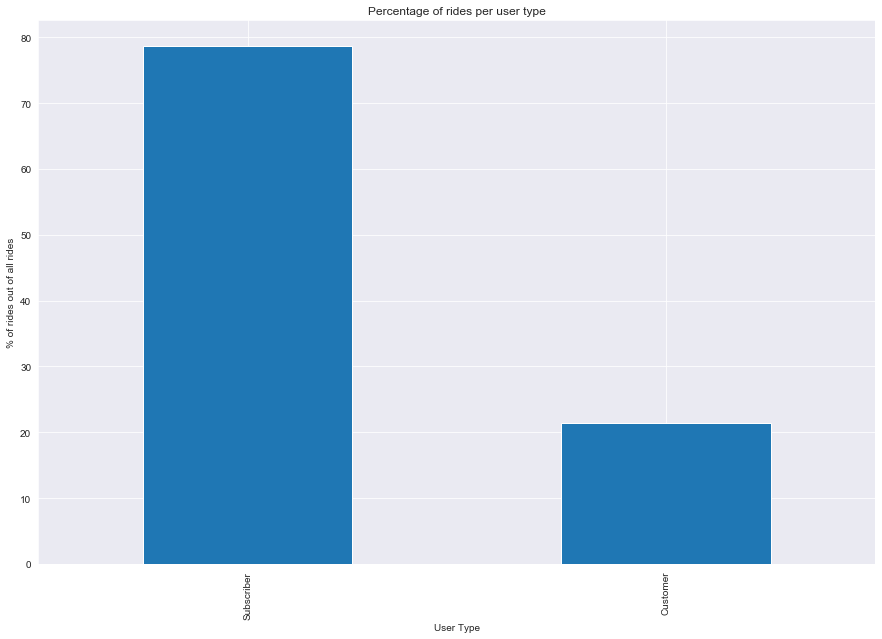

In [60]:
plt.figure(figsize=[15, 10])
(df_bike.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of rides per user type")
plt.ylabel("% of rides out of all rides")
plt.xlabel("User Type");

The user type "subscriber" is responsible for over 80% of the total rides. At the moment there are different subscriber and member packages available.   
Pricing details can be found under the following link: 
https://www.lyft.com/bikes/bay-wheels/pricing

## Is there a change of usage over the year (e.g. winter time vs. summer time)?

We want to check how the monthly distribution of rides over the year 2018 looks like.

Text(0.5, 0, 'Month')

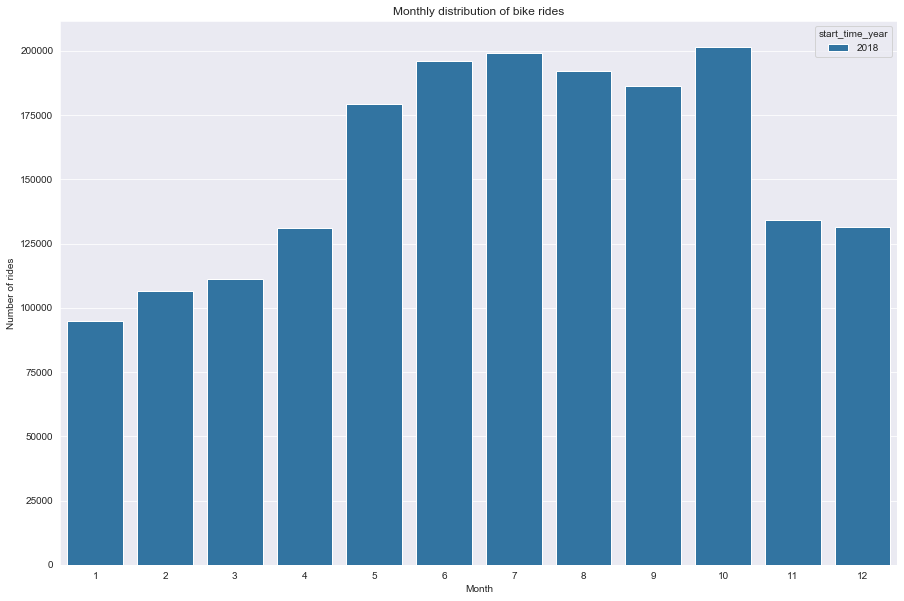

In [6]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike[df_bike['start_time_year']<2019], x='start_time_month',hue='start_time_year');
plt.title('Monthly distribution of bike rides for year 2018');
plt.ylabel('Number of rides');
plt.xlabel('Month')

And what about 2019?

Text(0.5, 0, 'Month')

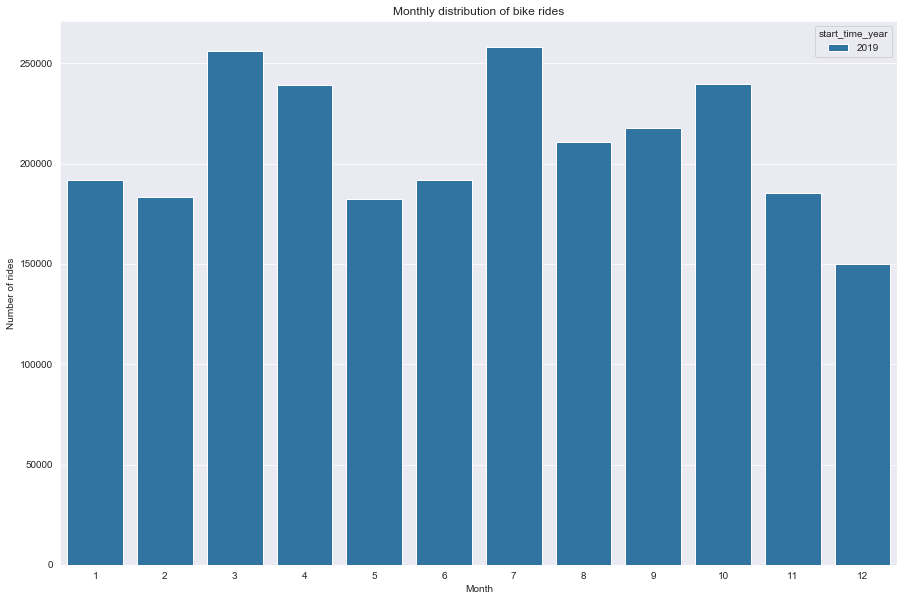

In [16]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike[df_bike['start_time_year']==2019], x='start_time_month',hue='start_time_year');
plt.title('Monthly distribution of bike rides for year 2019');
plt.ylabel('Number of rides');
plt.xlabel('Month')

It would be exciting to merge the graph from 2018 and 2019 into one graph. Ok, we will do this in the next chapter.

## Bivariate Exploration

In this section, we want to investigate the relationships between pairs of variables. We are going to explore how the length of the rides is distributed across the membership models mentioned before. 

## What is the distribution in a combined chart for 2018 and 2019?

Text(0.5, 0, 'Month')

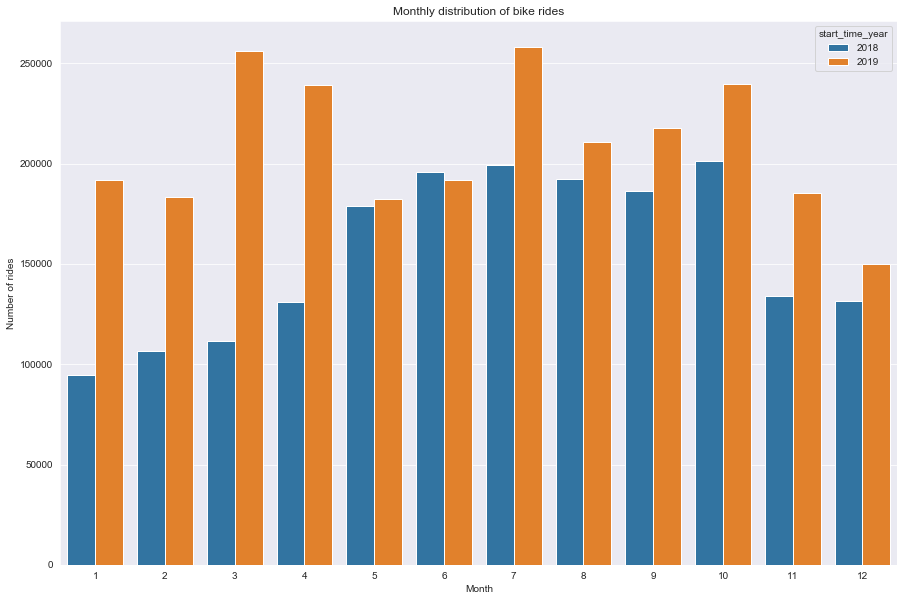

In [62]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike[df_bike['start_time_year']<2020], x='start_time_month',hue='start_time_year');
plt.title('Monthly distribution of bike rides');
plt.ylabel('Number of rides');
plt.xlabel('Month')

Idea for further assessments: plot in the average temperature in SF per month for 2018 and 2019 as line chart. 

The graph shows that for both years `2018` and `2019`, there seems to be a different usage of the bike ride service during summer vs. winter time. 

Difference between `2018` and `2019`, there was more travels during Spring and Automn in the year `2019`, the peak in `2018` was from may to october without a valley during summer.

`2018` has the major peak of use in July and October.  
`2019` has the major peak of use in March, April, July and October. 

## At what day per week the ride service is used from what user type?

Text(0.5, 0, 'Day')

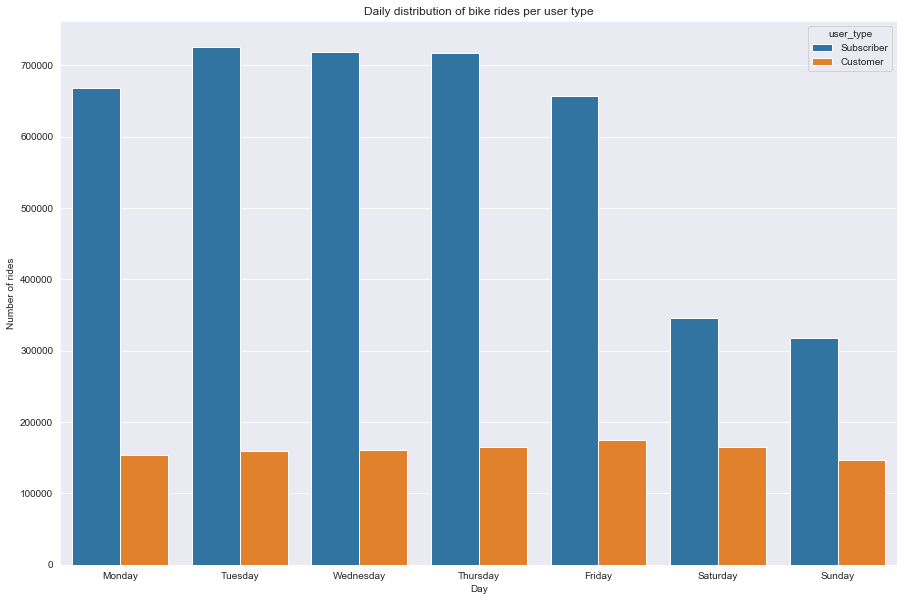

In [68]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike, x='start_time_dow', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='user_type');
plt.title('Daily distribution of bike rides per user type');
plt.ylabel('Number of rides');
plt.xlabel('Day')

As output from this graph it seems that the ForGoBike/ BayWheels service is mostly used by `subscribers` during workdays (Mo-Fr) rather than on the weekend (Sat and Sun).  
`Customers` use the service more on a regular base during weekday and weekend.

Is the service mostly used by `subscribers` for work and by students going from home to work/university and back?  
And maybe `customers` are more often tourists and visitors of the SF area?

Lets first have a look on the distribution per year and then make a deepdive on the questions. 

Text(0.5, 0, 'Day')

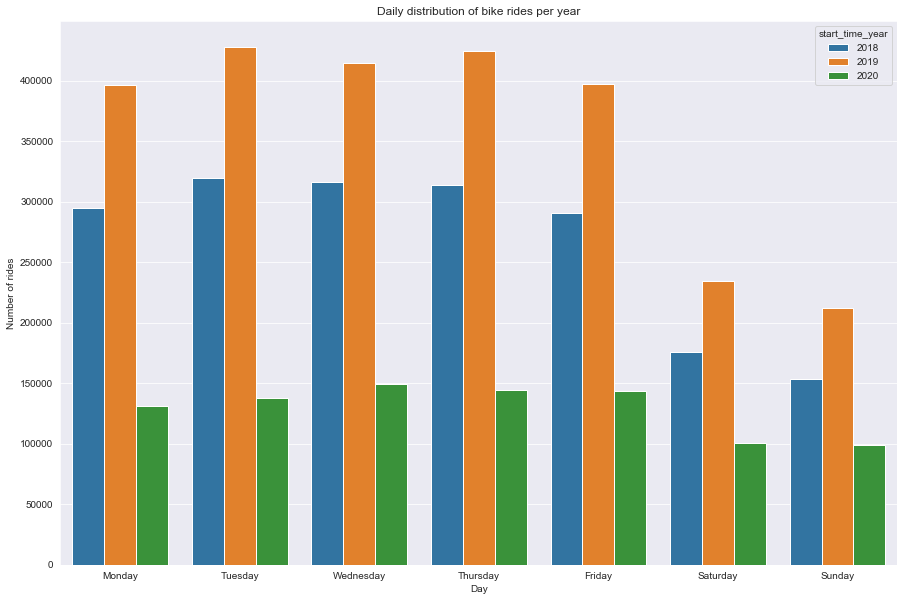

In [67]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike, x='start_time_dow', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='start_time_year');
plt.title('Daily distribution of bike rides per year');
plt.ylabel('Number of rides');
plt.xlabel('Day')

In this graph we can see, that the effect stays also over the years.

## Is the service mostly used by subscribers for work and by students going from home to work/university and back?

Text(0.5, 0, 'Hour')

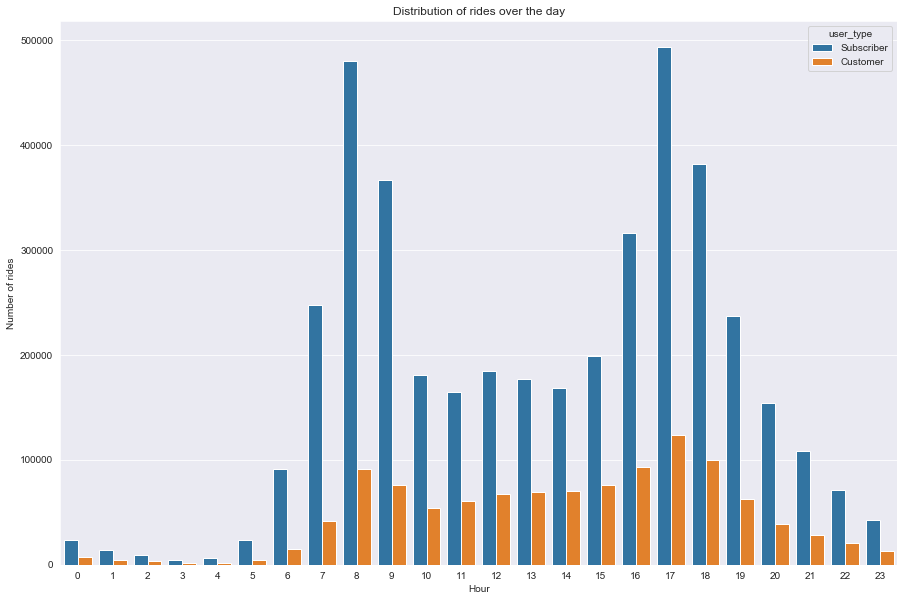

In [70]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike, x='start_time_hour', hue='user_type');
plt.title('Distribution of rides over the day');
plt.ylabel('Number of rides');
plt.xlabel('Hour')

The graph confirms our previously mentioned and analyzed questions and assumptions.

## What is the distribution of duration of a bike ride?

In this graph we want to analyse the distribution of the duration of the bike rides.

(1, 3000)

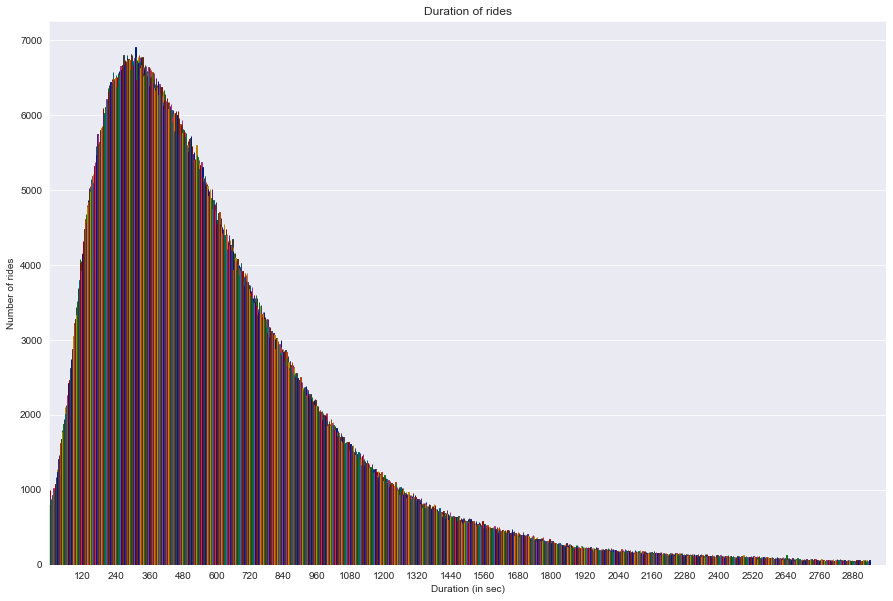

In [81]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df_bike[df_bike['duration_sec']<=3000], x='duration_sec', edgecolor=sb.color_palette("dark"));
plt.title('Duration of rides');
plt.ylabel('Number of rides');
plt.xlabel('Duration (in sec)')
ticks = np.arange(0, 3000, 120)
plt.xticks(ticks, ticks);
plt.xlim(1,3000)

The graph is limited to a duration of 3000 sec. 

The graph shows, that most travels are between 2 minutes (120 sec) and 12 minutes (720 sec).   

So the users are doing more short travels or comutes, rather than long rides with this bike ride service.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first visualization shows that the majority of the rides >80% were done by users of the `subscriber` type.  

We also found out that the service is used more on the `weekdays` than on the `weekends`. 

The majority of the useres are `subscribers` and riding the bike on `weekdays`starting between 7-9 a.m. and driving back between 4-6 p.m.  

Most bike rides go from `2 minutes` up to `12 minutes`. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The main part at the beginning was the gathering of the data and the combination of the differnt datasets and the different years. 

## Is there a correlation between duration and user type?

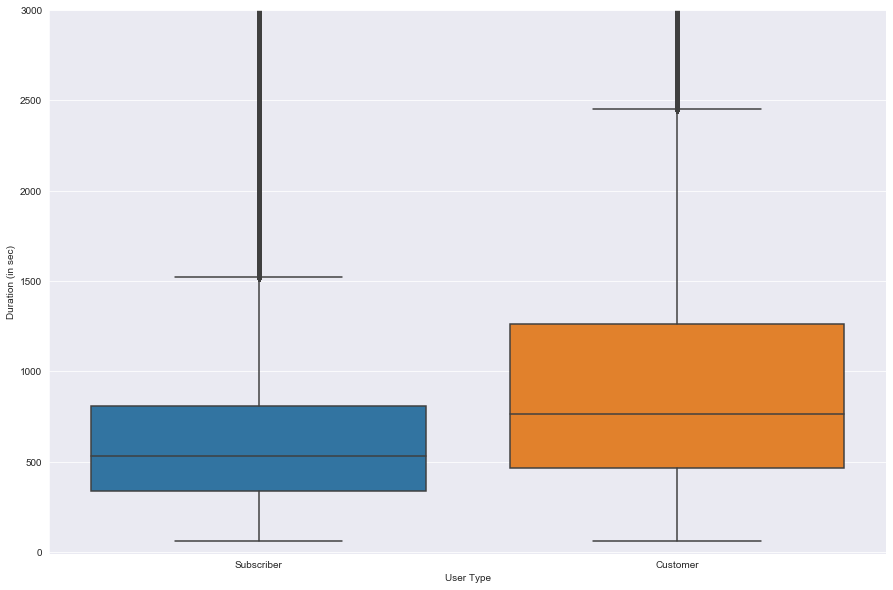

In [77]:
plt.figure(figsize=[15, 10])
sb.boxplot(data = df_bike, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 3000])
plt.xlabel('User Type')
plt.ylabel('Duration (in sec)')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The user type has definitely an impact on the duration of a ride as we can see in the boxplot.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the dataset are also a lot very long travels (>3.000 sec) with the bike available. 

## Multivariate Exploration

### How is the trip duration by day of the week compared to the user type?

In this graph we want to combine the graphs already shown above and analyse the duration of the ride per user type overthe weekdays with a boxplot. 

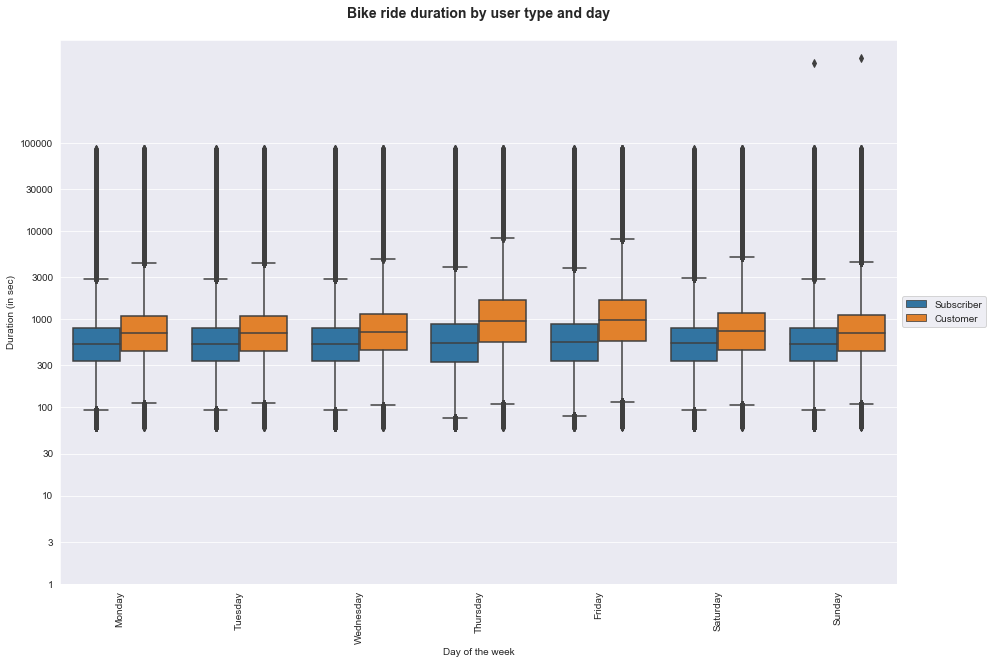

In [85]:
df_bike['duration_sec_log'] = np.log10(df_bike['duration_sec'])
plt.figure(figsize=(15,10))
sb.boxplot(data = df_bike, x = 'start_time_dow', y = 'duration_sec_log', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Day of the week')
plt.ylabel('Duration (in sec)')
plt.title('Bike ride duration by user type and day', y=1.03, fontsize=14, fontweight='semibold');

### Heatmap regarding the hourly usage during the day per user type.

During chapter Bivariate Exploration we analysed the start times of the users during the day in a bar chart.  
In order to be able to dive deeper into the topic here, we want to present the facts somewhat expanded in a heatmap.

In [101]:
#df_bike.head()

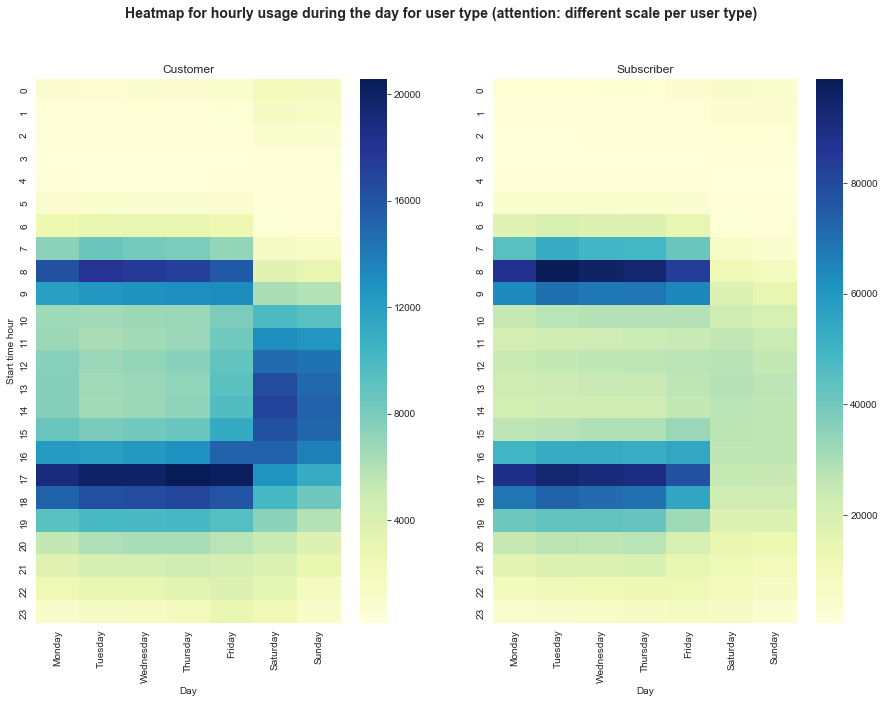

In [105]:
#Set order of weekday (start_time_dow)
df_bike['start_time_dow'] = pd.Categorical(df_bike['start_time_dow'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
plt.figure(figsize=(15,10))
plt.suptitle('Heatmap for hourly usage during the day for user type (attention: different scale per user type)', fontsize=14, fontweight='semibold')

#heatmap customers
plt.subplot(1, 2, 1)
df_customer = df_bike.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_dow"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_dow", "bike_id")
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.020)
plt.xlabel('Day')
plt.ylabel('Start time hour')

#heatmap subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_bike.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_dow"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_dow", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1.020)
plt.xlabel('Day')
plt.ylabel('');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Each property of the boxplot was higher for user type `Customer` than for user type `Subscriber`.  

In a next step, it would be important to examine the `outliers` in detail in terms of their duration.  

It is also questionable why `subscribers` and `customers` have significantly fewer rides on weekends, which also have a short duration.  



### Were there any interesting or surprising interactions between features?

From the last chapter I realy like the headmap of the `subscriber` user type.

From a business development perspective to gain more growth, we have to ask ourselves what we can do with the bikes in the timeframe from 10 a.m. up to 3 p.m. and in the timeslot 7 p.m. up to 6 a.m. to gain more profit?


### Resouces used in this project: 

https://stackoverflow.com/questions/3451111/unzipping-files-in-python  
https://docs.python.org/3/library/datetime.html
https://stackoverflow.com/questions/56350531/seaborn-violinplot-experiences-difficulty-with-too-many-variables  
https://seaborn.pydata.org/generated/seaborn.countplot.html  
https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name
https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://www.lyft.com/bikes/bay-wheels/pricing  
https://www.lyft.com/bikes/bay-wheels/system-data    
